# Heart Disease Presence Dataset

## Attribute Info:
    1) Age 
    2) Sex
    3) Chest Pain
    4) Resting Blood Pressure
    5) Serum Cholestrol
    6) Fasting Blood Sugar
    7) Resting electrocardiographic results
    8) Maximum heart rate achieved
    9) Exercise induced angina
    10) ST depression induced by exercise relative to rest
    11) The slope of the peak exercise ST segment
    12) Number of major vessels (0-3) 
    13) 3 = normal; 6 = fixed defect; 7 = reversable defect
    14) Target - 1 or 0

In [1]:
import numpy as np
import thinkplot
import thinkstats2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew, binom

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Outlier Removal

In [6]:
df1 = df.copy()
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df1 = df1[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


(228, 14)

### Exploratory Data Analysis

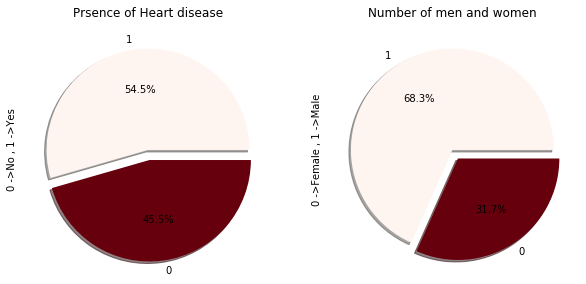

In [7]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Prsence of Heart disease')
df['target'].value_counts().plot.pie(explode=[0.0,0.1],autopct='%.1f%%',shadow=True, cmap='Reds',ax= ax[0])
ax[0].set_ylabel("0 ->No , 1 ->Yes")
plt.title('Number of men and women')
df['sex'].value_counts().plot.pie(explode=[0.0,0.1],autopct='%.1f%%',shadow=True, cmap='Reds',ax= ax[1])
ax[1].set_ylabel("0 ->Female , 1 ->Male");

- No null objects in our dataset.
- (228,14) is the new shape of the dataset.
- Classification on the basis of Target(Presence of Disease or Not).
- 54.5% people have the disease and 45.5% don't.
- 68.3% people are male and 31.7% are female.

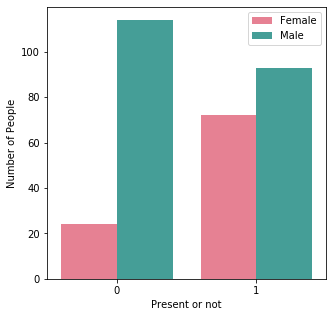

In [8]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'target',data = df,hue = 'sex',palette = 'husl')
plt.xlabel('Present or not')
plt.ylabel('Number of People')
plt.legend(['Female','Male']);

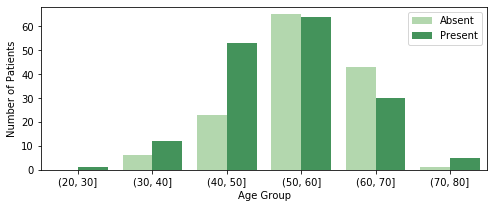

In [9]:
plt.figure(figsize = (8,3))
bins = [20,30,40,50,60,70,80]
df['age_bins']=pd.cut(df['age'], bins=bins)
g1=sns.countplot(x='age_bins',data=df ,hue='target',palette='Greens',linewidth=1)
plt.legend(['Absent','Present'])
plt.xlabel('Age Group')
plt.ylabel('Number of Patients');

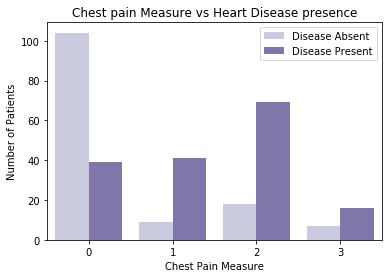

In [10]:
sns.countplot(x='cp',data=df,hue='target',palette='Purples',linewidth=1)
plt.title('Chest pain Measure vs Heart Disease presence')
plt.ylabel('Number of Patients')
plt.xlabel('Chest Pain Measure')
plt.legend(['Disease Absent','Disease Present']);

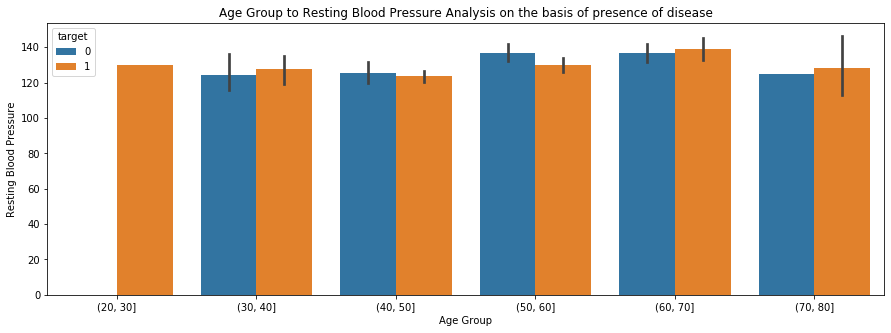

In [11]:
plt.figure(figsize = (15,5))
sns.barplot(x=df['age_bins'],y=df['trestbps'],hue = df['target'])
plt.xlabel('Age Group')
plt.ylabel('Resting Blood Pressure')
plt.title('Age Group to Resting Blood Pressure Analysis on the basis of presence of disease');

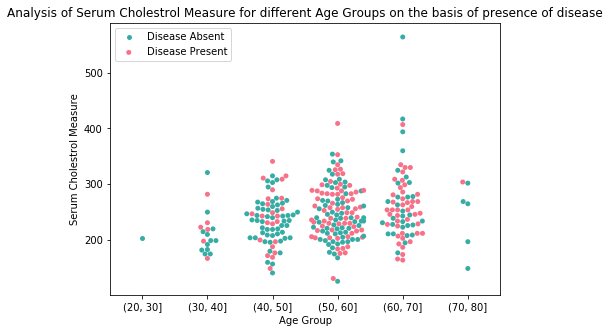

In [12]:
plt.figure(figsize = (7,5))
sns.swarmplot(x='age_bins',y= 'chol',data=df,hue='target',palette='husl')
plt.title('Analysis of Serum Cholestrol Measure for different Age Groups on the basis of presence of disease')
plt.xlabel('Age Group')
plt.ylabel('Serum Cholestrol Measure')
plt.legend(['Disease Absent','Disease Present']);

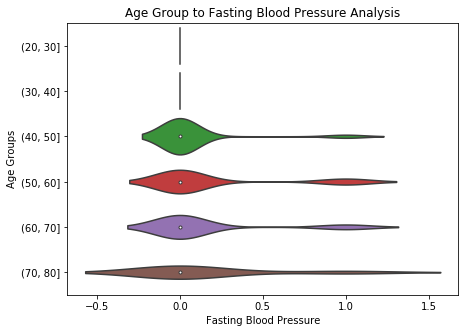

In [13]:
plt.figure(figsize = (7,5))
sns.violinplot(x=df['fbs'],y=df['age_bins'])
plt.xlabel('Fasting Blood Pressure')
plt.ylabel('Age Groups')
plt.title('Age Group to Fasting Blood Pressure Analysis');

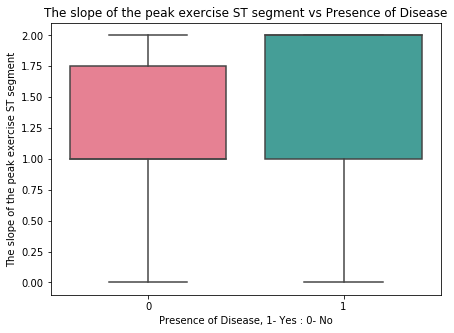

In [14]:
plt.figure(figsize = (7,5))
sns.boxplot(x='target',y= 'slope',data=df,palette='husl')
plt.title('The slope of the peak exercise ST segment vs Presence of Disease')
plt.xlabel('Presence of Disease, 1- Yes : 0- No')
plt.ylabel('The slope of the peak exercise ST segment');

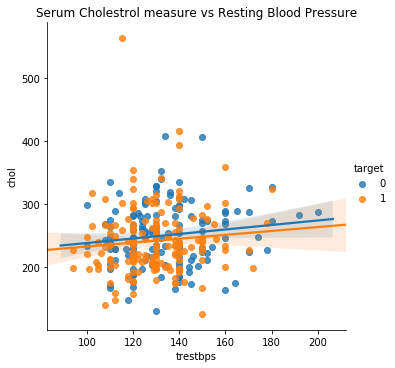

In [15]:
sns.lmplot(x="trestbps", y="chol",data=df,hue='target')
plt.title('Serum Cholestrol measure vs Resting Blood Pressure');

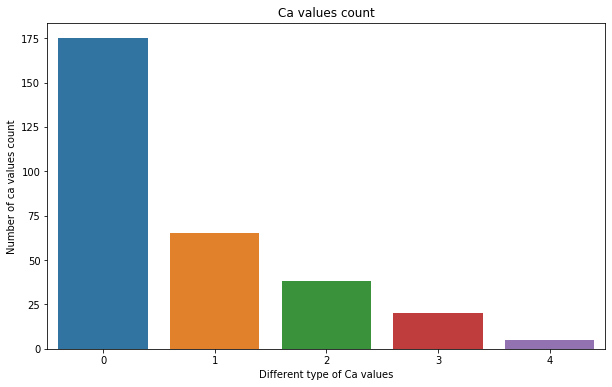

In [16]:
plt.figure(figsize=(10,6))
count= df['ca'].value_counts()
sns.barplot(x=count.index, y=count.values)
plt.ylabel("Number of ca values count")
plt.xlabel("Different type of Ca values")
plt.title("Ca values count");

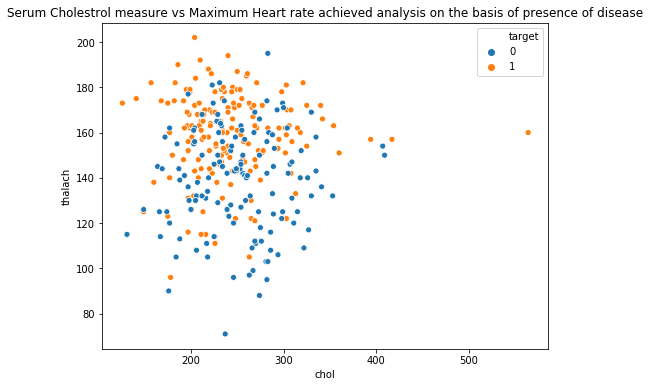

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.title('Serum Cholestrol measure vs Maximum Heart rate achieved analysis on the basis of presence of disease');

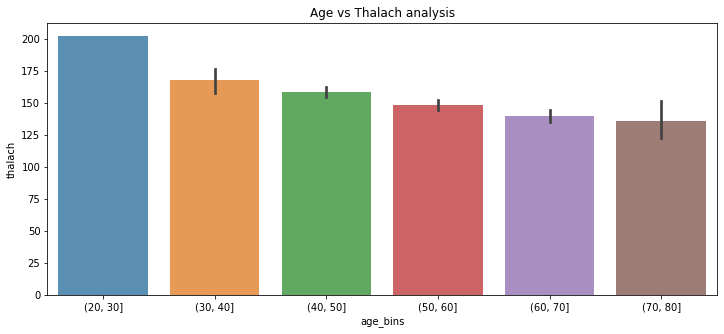

In [18]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['age_bins'],y=df['thalach'],data = df,alpha=0.8)
plt.title('Age vs Thalach analysis');

### Now to apply thinkstats2 and thinkplot

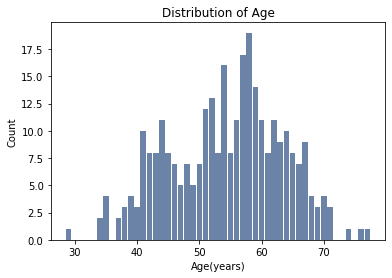

In [19]:
hist_age = thinkstats2.Hist(df['age'])
thinkplot.hist(hist_age)
plt.title('Distribution of Age')
thinkplot.Config(xlabel='Age(years)', ylabel='Count');

In [20]:
print('kurtosis of Age: {}'.format(kurtosis(df['age'])))
print('skewness of Age: {}'.format(skew(df['age'])))

kurtosis of Age: -0.55299857127345
skewness of Age: -0.2014596901125439


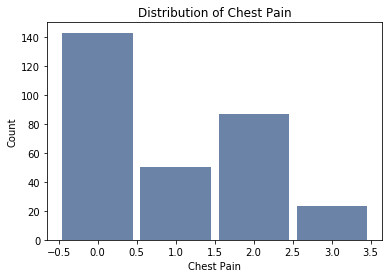

In [21]:
hist_cp = thinkstats2.Hist(df['cp'])
thinkplot.hist(hist_cp)
plt.title('Distribution of Chest Pain')
thinkplot.Config(xlabel='Chest Pain', ylabel='Count');

In [22]:
print('kurtosis of Chest Pain: {}'.format(kurtosis(df['cp'])))
print('skewness of Chest Pain: {}'.format(skew(df['cp'])))

kurtosis of Chest Pain: -1.1932109350319449
skewness of Chest Pain: 0.4823293961332623


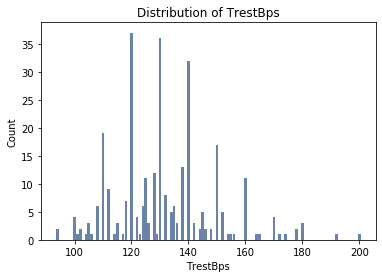

In [23]:
hist_bps = thinkstats2.Hist(df['trestbps'])
thinkplot.hist(hist_bps)
plt.title('Distribution of TrestBps')
thinkplot.Config(xlabel='TrestBps', ylabel='Count');

In [24]:
print('kurtosis of TrestBps: {}'.format(kurtosis(df['trestbps'])))
print('skewness of TrestBps: {}'.format(skew(df['trestbps'])))

kurtosis of TrestBps: 0.8940569555069118
skewness of TrestBps: 0.7102300604861443


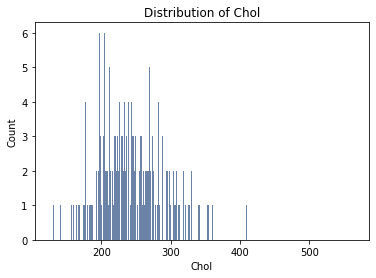

In [25]:
hist_chol = thinkstats2.Hist(df['chol'])
thinkplot.hist(hist_chol)
plt.title('Distribution of Chol')
thinkplot.Config(xlabel='Chol', ylabel='Count');

In [26]:
print('kurtosis of Cholestrol: {}'.format(kurtosis(df['chol'])))
print('skewness of Cholestrol: {}'.format(skew(df['chol'])))

kurtosis of Cholestrol: 4.411682119729873
skewness of Cholestrol: 1.1377326187082244


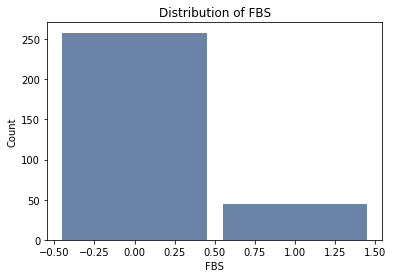

In [27]:
hist_fbs = thinkstats2.Hist(df['fbs'])
thinkplot.hist(hist_fbs)
plt.title('Distribution of FBS')
thinkplot.Config(xlabel='FBS', ylabel='Count');

In [28]:
print('kurtosis of FBS: {}'.format(kurtosis(df['fbs'])))
print('skewness of FBS: {}'.format(skew(df['fbs'])))

kurtosis of FBS: 1.9077519379844965
skewness of FBS: 1.976803464683451


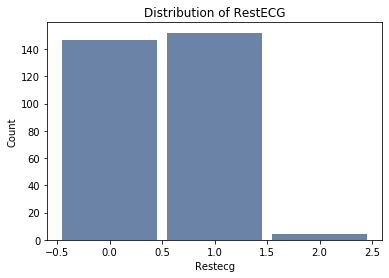

In [29]:
hist_ecg = thinkstats2.Hist(df['restecg'])
thinkplot.hist(hist_ecg)
plt.title('Distribution of RestECG')
thinkplot.Config(xlabel='Restecg', ylabel='Count');

In [30]:
print('kurtosis of restecg: {}'.format(kurtosis(df['restecg'])))
print('skewness of restecg: {}'.format(skew(df['restecg'])))

kurtosis of restecg: -1.3600274409622233
skewness of restecg: 0.1617165704075642


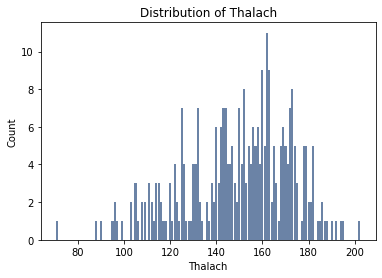

In [31]:
hist_th = thinkstats2.Hist(df['thalach'])
thinkplot.hist(hist_th)
plt.title('Distribution of Thalach')
thinkplot.Config(xlabel='Thalach', ylabel='Count');

In [32]:
print('kurtosis of thalach: {}'.format(kurtosis(df['thalach'])))
print('skewness of thalach: {}'.format(skew(df['thalach'])))

kurtosis of thalach: -0.08068888039194055
skewness of thalach: -0.5347455419075503


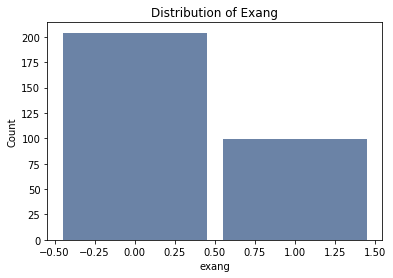

In [33]:
hist_ex = thinkstats2.Hist(df['exang'])
thinkplot.hist(hist_ex)
plt.title('Distribution of Exang')
thinkplot.Config(xlabel='exang', ylabel='Count');

In [34]:
print('kurtosis of exang: {}'.format(kurtosis(df['exang'])))
print('skewness of exang: {}'.format(skew(df['exang'])))

kurtosis of exang: -1.4540998217468801
skewness of exang: 0.7388505791113107


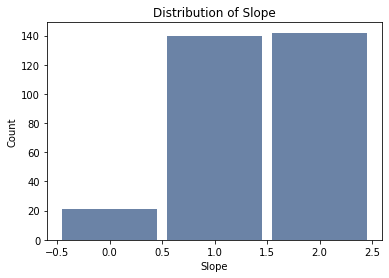

In [35]:
hist_sl = thinkstats2.Hist(df['slope'])
thinkplot.hist(hist_sl)
plt.title('Distribution of Slope')
thinkplot.Config(xlabel='Slope', ylabel='Count');

In [36]:
print('kurtosis of slope: {}'.format(kurtosis(df['slope'])))
print('skewness of slope: {}'.format(skew(df['slope'])))

kurtosis of slope: -0.6369501947346548
skewness of slope: -0.5057957274757736


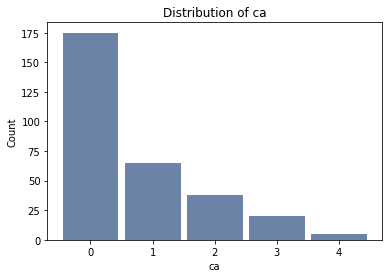

In [37]:
hist_ca = thinkstats2.Hist(df['ca'])
thinkplot.hist(hist_ca)
plt.title('Distribution of ca')
thinkplot.Config(xlabel='ca', ylabel='Count');

In [38]:
print('kurtosis of ca: {}'.format(kurtosis(df['ca'])))
print('skewness of ca: {}'.format(skew(df['ca'])))

kurtosis of ca: 0.8057311214832796
skewness of ca: 1.303925955673585


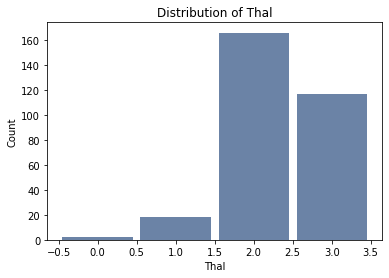

In [39]:
hist_thal = thinkstats2.Hist(df['thal'])
thinkplot.hist(hist_thal)
plt.title('Distribution of Thal')
thinkplot.Config(xlabel='Thal', ylabel='Count');

In [40]:
print('kurtosis of thal: {}'.format(kurtosis(df['thal'])))
print('skewness of thal: {}'.format(skew(df['thal'])))

kurtosis of thal: 0.2732845857908739
skewness of thal: -0.47435893118696904


### PMF

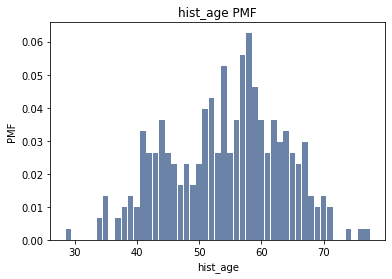

In [41]:
n = hist_age.Total()
pmf = hist_age.Copy()
for x, freq in hist_age.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_age', ylabel='PMF')
plt.title('hist_age PMF');

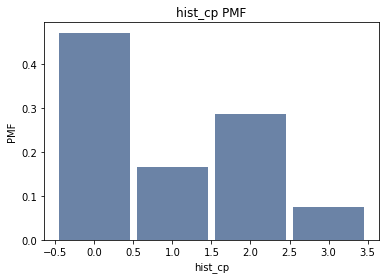

In [42]:
n = hist_cp.Total()
pmf = hist_cp.Copy()
for x, freq in hist_cp.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_cp', ylabel='PMF')
plt.title('hist_cp PMF');

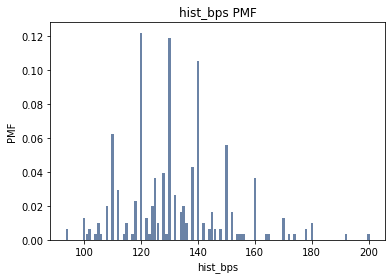

In [43]:
n = hist_bps.Total()
pmf = hist_bps.Copy()
for x, freq in hist_bps.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_bps', ylabel='PMF')
plt.title('hist_bps PMF');

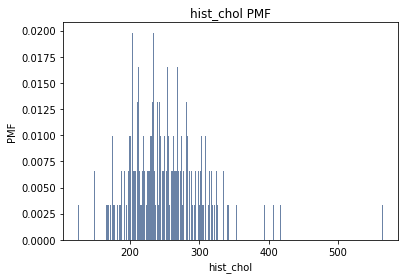

In [44]:
n = hist_chol.Total()
pmf = hist_chol.Copy()
for x, freq in hist_chol.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_chol', ylabel='PMF')
plt.title('hist_chol PMF');

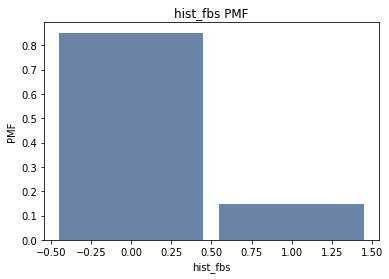

In [45]:
n = hist_fbs.Total()
pmf = hist_fbs.Copy()
for x, freq in hist_fbs.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_fbs', ylabel='PMF')
plt.title('hist_fbs PMF');

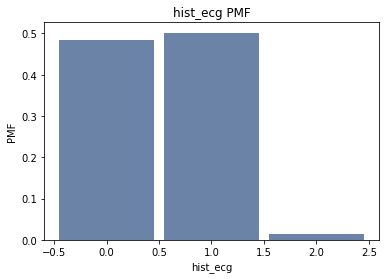

In [46]:
n = hist_ecg.Total()
pmf = hist_ecg.Copy()
for x, freq in hist_ecg.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_ecg', ylabel='PMF')
plt.title('hist_ecg PMF');

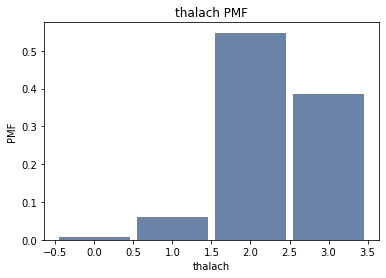

In [47]:
n = hist_thal.Total()
pmf = hist_thal.Copy()
for x, freq in hist_thal.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='thalach', ylabel='PMF')
plt.title('thalach PMF');

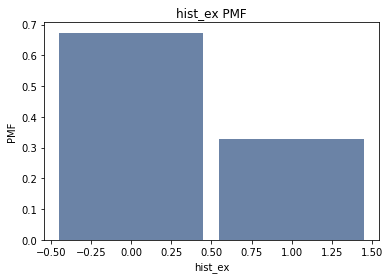

In [48]:
n = hist_ex.Total()
pmf = hist_ex.Copy()
for x, freq in hist_ex.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_ex', ylabel='PMF')
plt.title('hist_ex PMF');

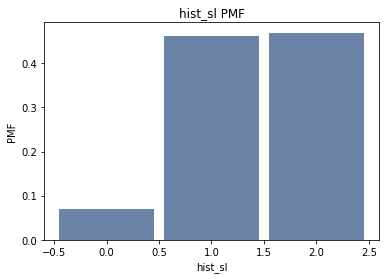

In [49]:
n = hist_sl.Total()
pmf = hist_sl.Copy()
for x, freq in hist_sl.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_sl', ylabel='PMF')
plt.title('hist_sl PMF');

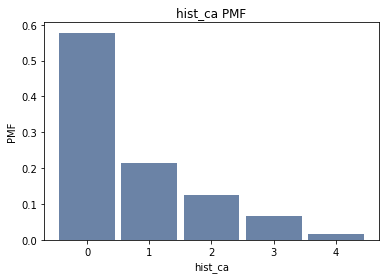

In [50]:
n = hist_ca.Total()
pmf = hist_ca.Copy()
for x, freq in hist_ca.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_ca', ylabel='PMF')
plt.title('hist_ca PMF');

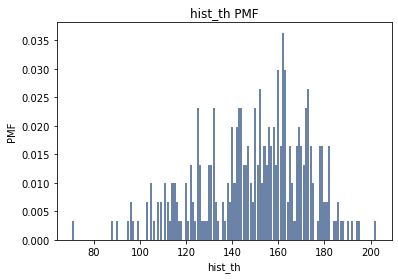

In [51]:
n = hist_th.Total()
pmf = hist_th.Copy()
for x, freq in hist_th.Items():
    pmf[x] = freq / n
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='hist_th', ylabel='PMF')
plt.title('hist_th PMF');

In [52]:
df.drop('age_bins',inplace = True,axis =1)

### PDF

In [53]:
present = df[df['target']==1]
cholestrol = present['chol']
mean, std = cholestrol.mean(), cholestrol.std()
mean, std

(242.23030303030302, 53.55287155453835)

In [54]:
pdf = thinkstats2.NormalPdf(mean, std)
pdf.Density(mean + std)

0.0045183520042005555

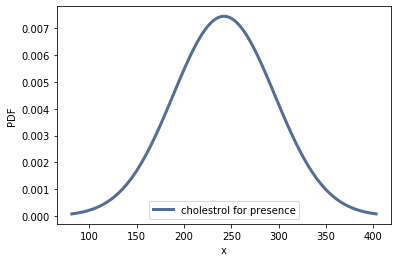

In [55]:
thinkplot.Pdf(pdf, label='cholestrol for presence')
thinkplot.Config(xlabel='x', ylabel='PDF')

In [56]:
absent = df[df['target']==0]
cholestrol = absent['chol']
mean, std = cholestrol.mean(), cholestrol.std()
mean, std

(251.08695652173913, 49.45461360407158)

In [57]:
pdf = thinkstats2.NormalPdf(mean, std)
pdf.Density(mean + std)

0.0048927836431265125

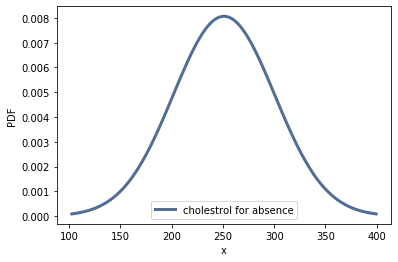

In [58]:
thinkplot.Pdf(pdf, label='cholestrol for absence')
thinkplot.Config(xlabel='x', ylabel='PDF')

## HYPOTESIS

### a) Hypotesis Test On basis of Sex
#### 1. Decide on the hypotesis
#### null hypotesis is :- doctors claim that out of the number of people who have heart diseases 43.6% are female.
#### Alternate hypotesis is :- more than 43.6% are female.
#### H0: p = 0.436
#### h1: p > 0.436
#### 2. Choose the test statistics
#### If we use X to represent the number of people  in the sample, this means that we can use X as our test statistic. There are 165  people in the sample as out of 303 people in the sample only 165 had the heart diseases present in them , and the probability of success according to the doctors  are 0.32. As X follows a binomial distribution, this means that the test statistic is actually:
#### X ~ B(165, 0.436) 
#### So our test statistic is  X ~ B(165, 0.436) 
#### 3. Determine the Critical Region
#### Let’s use a significance level of 90% in our hypothesis test. This means that if out of the number of people who have heart diseases 43.6% are female  in the sample is in the highest 90% of the probability distribution, then we will reject the claims of the drug company. That out of the number of people who have heart diseases 43.6% are female.  in the sample in the top 90% of the probability distribution, then we’ll decide there isn’t enough evidence to reject the null hypothesis, and accept the claims of the drug company.
#### α = 90%
#### In this we will use upper one - tailed test 
#### 4. Finding the p- value

#### Using Discreet Sampling

In [59]:
df[(df['target']==1) & (df['sex'] == 0 )].count()

age         72
sex         72
cp          72
trestbps    72
chol        72
fbs         72
restecg     72
thalach     72
exang       72
oldpeak     72
slope       72
ca          72
thal        72
target      72
dtype: int64

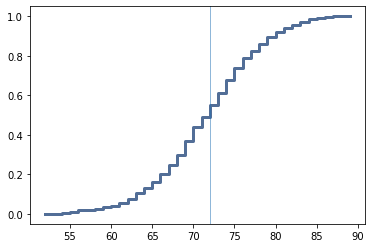

In [60]:
n2, p2 = 165, 0.436 # number of trials, probability of each trial
sample_binomial2 = np.random.binomial(n2, p2, 1000)
binomial_cdf2 = thinkstats2.Cdf(sample_binomial2)
thinkplot.Cdf(binomial_cdf2)
thinkplot.axvline(72)

In [61]:
binomial_cdf2.Prob(72)

0.552

In [62]:
# Analytic method
binom.cdf(72, 165, 0.436, loc=0)

0.5363340284637621

#### Step 5: Is the sample result in the critical region?

Now that we’ve found the p-value, we can use it to see whether the result
from our sample falls within the critical region. If it does, then we’ll have
sufficient evidence to reject the claims of the doctors .

Our critical region is the lower tail of the probability distribution, and
we’re using a significance level of 90%. This means that we can reject the
null hypothesis if our p-value is more than  0.9. As our p-value is 0.58, this
means that the number of people having cholestrol level of 246 in the sample doesn’t
fall within the critical region.


#### Step 6: Make your decision

We’ve now reached the final step of the hypothesis test. We can decide
whether to accept the null hypothesis, or reject it in favor of the alternative.

The p-value of the hypothesis test falls just outside the critical region of
the test. This means that there isn’t sufficient evidence to reject the null
hypothesis. In other words:

We accept the claims of the doctors

### b) Hypotesis Test On basis of maximum heart rate achieved 
#### 1. Decide on the hypotesis
#### null hypotesis is :- doctors claim that 18.1% of people had maximum heart rate in between 135 to 150.
#### Alternate hypotesis is :- more 18.1% of people had maximum heart rate in between 135 to 150.
#### H0: p = 0.8
#### h1: p > 0.181
#### 2. Choose the test statistics
#### If we use X to represent the number of people  in the sample, this means that we can use X as our test statistic. There are 303 people in the sample as out of 303 people in the sample, and the probability of success according to the doctors  are 0.181. As X follows a binomial distribution, this means that the test statistic is actually:
#### X ~ B(303, 0.181) 
#### So our test statistic is  X ~ B(303, 0.181) 
#### 3. Determine the Critical Region
#### Let’s use a significance level of 90% in our hypothesis test. This means that 18.1% of people had maximum heart rate in between 135 to 150 in the sample is in the highest 90% of the probability distribution, then we will reject the claims of the drug company. that 18.1% of people had maximum heart rate in between 135 to 150   in the sample in the top 90% of the probability distribution, then we’ll decide there isn’t enough evidence to reject the null hypothesis, and accept the claims of the drug company.
#### α = 90%
#### In this we will use upper one - tailed test 
#### 4. Finding the p- value Using Discreet Sampling

In [63]:
df[(df['thalach']> 135) & (df['thalach']< 150)].count()

age         55
sex         55
cp          55
trestbps    55
chol        55
fbs         55
restecg     55
thalach     55
exang       55
oldpeak     55
slope       55
ca          55
thal        55
target      55
dtype: int64

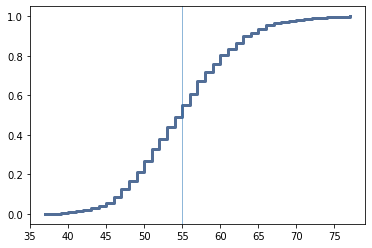

In [64]:
n3, p3 = 303, .181  # number of trials, probability of each trial
sample_binomial3 = np.random.binomial(n3, p3, 1000)
binomial_cdf3 = thinkstats2.Cdf(sample_binomial3)
thinkplot.Cdf(binomial_cdf3)
thinkplot.axvline(55)


In [65]:
binomial_cdf3.Prob(55)

0.553

#### Step 5: Is the sample result in the critical region?

Now that we’ve found the p-value, we can use it to see whether the result
from our sample falls within the critical region. If it does, then we’ll have
sufficient evidence to reject the claims of the doctors .

Our critical region is the lower tail of the probability distribution, and
we’re using a significance level of 90%. This means that we can reject the
null hypothesis if our p-value is more tha 0.9. As our p-value is 0.545, this
means that the number of people having heart diseases  in the age group between 45 to 60 doesn’t
fall within the critical region.


#### Step 6: Make your decision

We’ve now reached the final step of the hypothesis test. We can decide
whether to accept the null hypothesis, or reject it in favor of the alternative.

The p-value of the hypothesis test falls just outside the critical region of
the test. This means that there isn’t sufficient evidence to reject the null
hypothesis. In other words:

We accept the claims of the doctors.